<a href="https://colab.research.google.com/github/sadiaorpi/Netflix-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will analyze the Kaggle Datset "Best Shows on Netflix" to display different graphs and statistics based on the given data.

https://www.kaggle.com/datasets/thedevastator/netflix-top-rated-movies-and-tv-shows-2020-2022?select=Best+Movies+Netflix.csv

Created by: Sadia Orpi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# import dataset and create as file variable
file = ('/content/drive/MyDrive/PS4CS/Best Shows Netflix.csv')

# read in data set
shows = pd.read_csv(file)

# displaying the top 200 shows of the CSV file
shows.head(200)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...,...
195,195,Inside Job,2021,7.6,15137,28,1,comedy,US
196,196,The Serpent,2021,7.6,41782,57,1,drama,GB
197,197,Alice in Borderland,2020,7.6,47651,47,2,action,JP
198,198,Spinning Out,2020,7.6,13692,50,1,drama,US


In [ ]:
# Here is an example of grouping the data by categorical values such as the genre. I chose to group them by drama.

drama_shows = (shows.groupby('MAIN_GENRE'))
allDramas = drama_shows.get_group('drama')
allDramas.head(20)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
7,7,Hunter x Hunter,2011,9.0,87857,23,3,drama,JP
11,11,Heartstopper,2022,8.9,28978,28,1,drama,GB
12,12,When They See Us,2019,8.9,114127,74,1,drama,US
14,14,BoJack Horseman,2014,8.8,143584,26,6,drama,US
17,17,Narcos,2015,8.8,404486,52,3,drama,US
19,19,Peaky Blinders,2013,8.8,485506,58,6,drama,GB
20,20,Anne with an E,2017,8.7,51001,46,3,drama,CA
22,22,House of Cards,2013,8.7,494092,52,6,drama,US


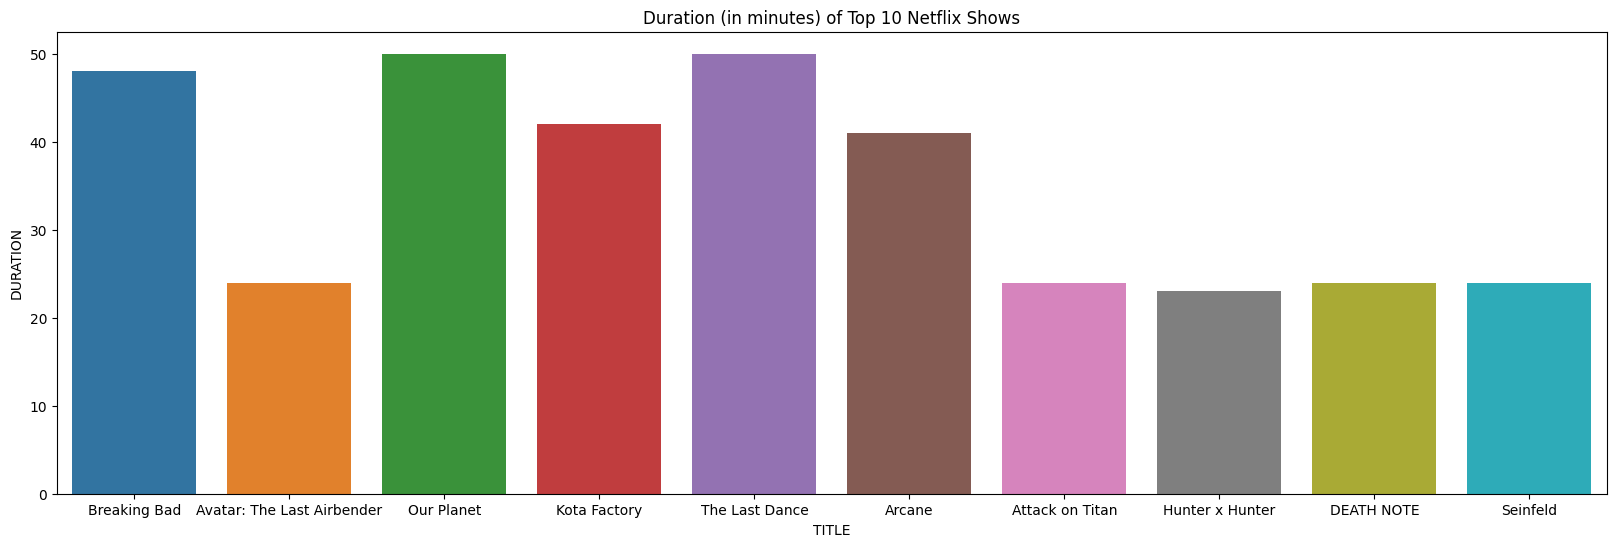

In [ ]:
# Bar graph to display average Duration (in minutes) of Top 10 Netflix Shows (for each episode)

plt.figure(figsize=(20,6))
plt.title("Duration (in minutes) of Top 10 Netflix Shows",fontsize=12)
sns.barplot(data = shows.head(10), y= 'DURATION', x= 'TITLE')
plt.show()

The Bar graph is a visual tool that uses bars to compare data among categories. The bar graph above is a categorical graph that depicts the average duration time (in minutes) for each episode of the top 10 Netflix shows. As we can see, Breaking Bad, Our Planet, and The Last Dance have the longest durations, while Avatar: The Last Airbender, Hunter x Hunter, and Attack on Titan for example range in the 20 minute range.

Bar charts do not show median, mode, min, or max, however down below there is a box plot for the same data that does.

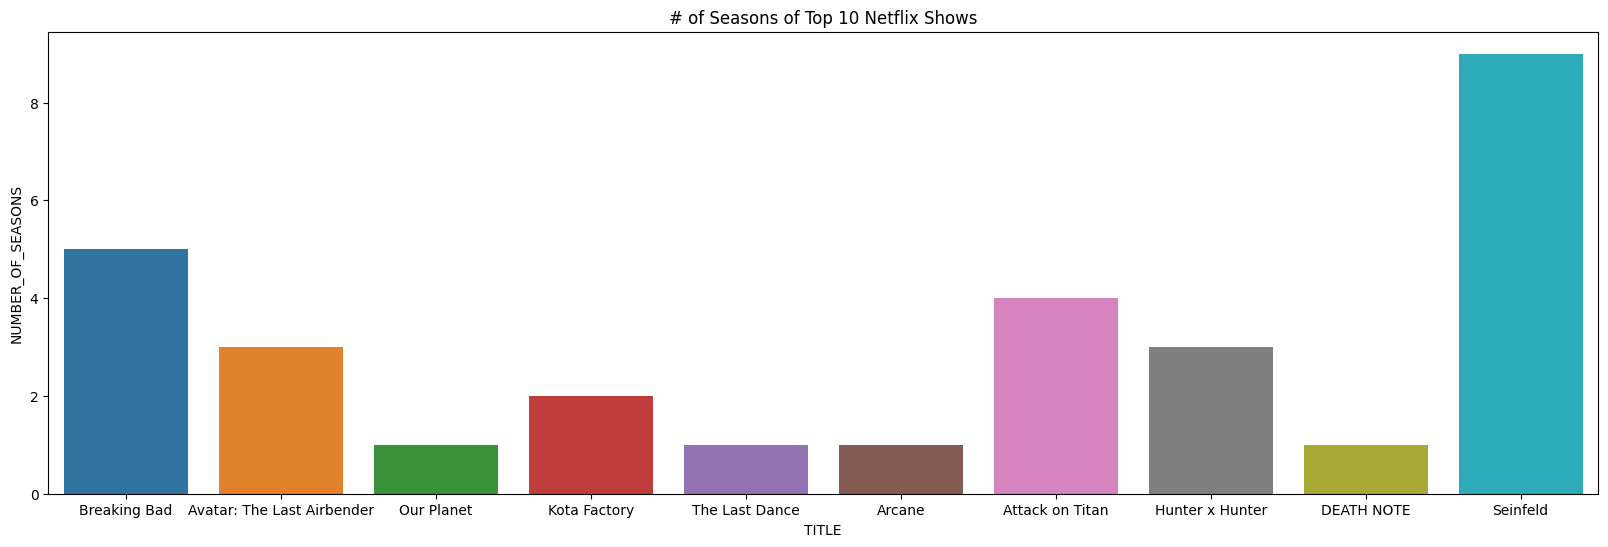

In [ ]:
# Bar graph to display Number of Seasons of Top 10 Netflix Shows

plt.figure(figsize=(20,6))
plt.title("# of Seasons of Top 10 Netflix Shows",fontsize=12)
sns.barplot(data = shows.head(10), y= 'NUMBER_OF_SEASONS', x= 'TITLE')
plt.show()

Again, this is another bar graph similar to the one above. This bar graph displays the number of seasons the top 10 Netflix shows have. From this graph we can easily see that Seinfield has the most at over 8 seasons whereas Our Planet only has 1.

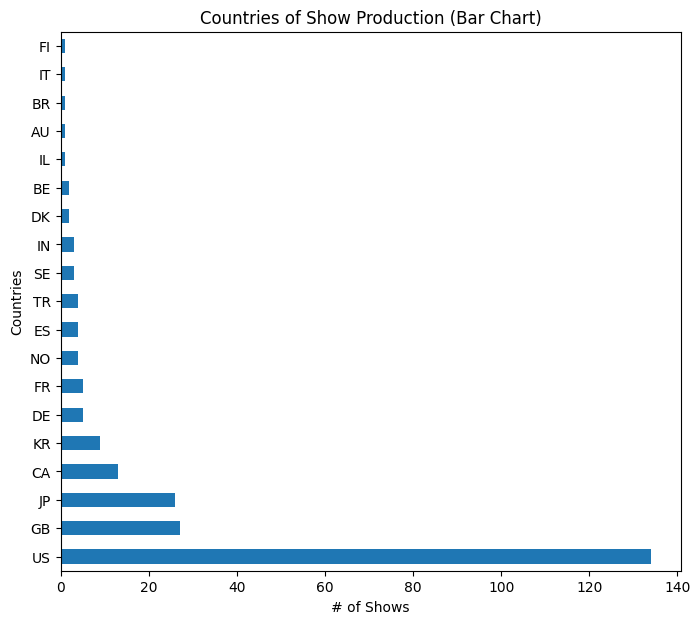

In [ ]:
# Bar Chart for Country of Production

ax = plt.figure(figsize=(8,7))
ax = shows['MAIN_PRODUCTION'].value_counts().plot(kind='barh')

# Set title and axis labels
ax.set_title('Countries of Show Production (Bar Chart)')
ax.set_ylabel('Countries')
ax.set_xlabel('# of Shows')

# Display Bar Chart
plt.show()

Here is another bar graph similar to the one above. This bar graph displays the number of shows that each country produced from the whole dataset From this graph we can easily see that US produces the most with Great Britain and Japan following shortly after.

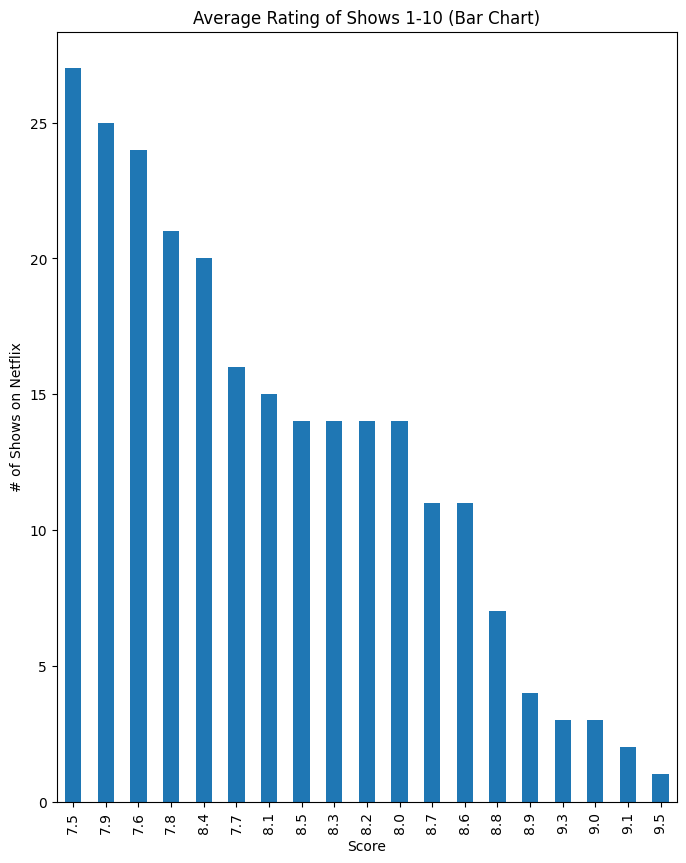

In [ ]:
# Bar Chart to display average duration of shows

ax = plt.figure(figsize=(8,10))
ax = shows['SCORE'].value_counts().plot(kind='bar')

# Set title and axis labels
ax.set_title('Average Rating of Shows 1-10 (Bar Chart)')
ax.set_ylabel('# of Shows on Netflix')
ax.set_xlabel('Score')

# Display Bar Chart
plt.show()

Last bar chart! This one above displays the average score for Netflix Shows with most ranging in the 7's and very few receiving a score of above 9.0.

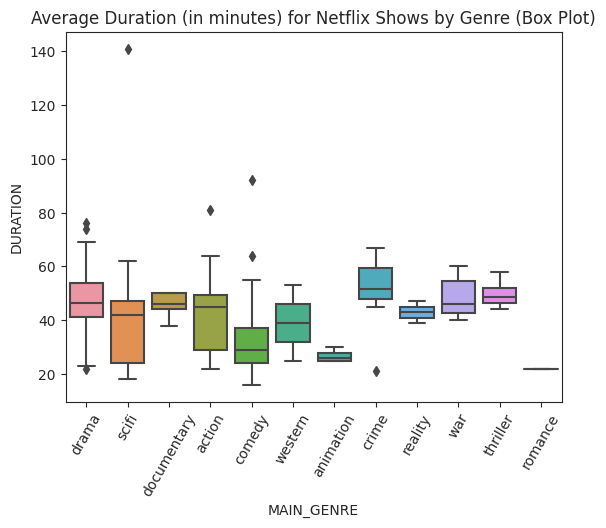

In [ ]:
# Box plots are used to show distributions of numeric data values.

# Plot the graph
sns.set_style('ticks', {'xtick.major.size': 15, 'ytick.major.size': 15})
sns.boxplot(data = shows, x = 'MAIN_GENRE', y = 'DURATION')
plt.xticks(rotation = 60)
plt.title("Average Duration (in minutes) for Netflix Shows by Genre (Box Plot)")

# Display the graph
plt.show()

Box plots are useful for displaying and comparing the distribution of a dataset. They provide a visual summary of the minimum and maximum values, the median, and the spread of the data. The box plot above displays the duration (in minutes) grouped by genres. Based on the above data, we can see that duration for some genres such as sci-fi, comedy, and action are much lower in time compared to other genres such as crime, war, and thriller. Points on the graph show outliers, such as the 2 points for comedy that were 65 and 90 minutes.

Text(0, 0.5, 'Genre')

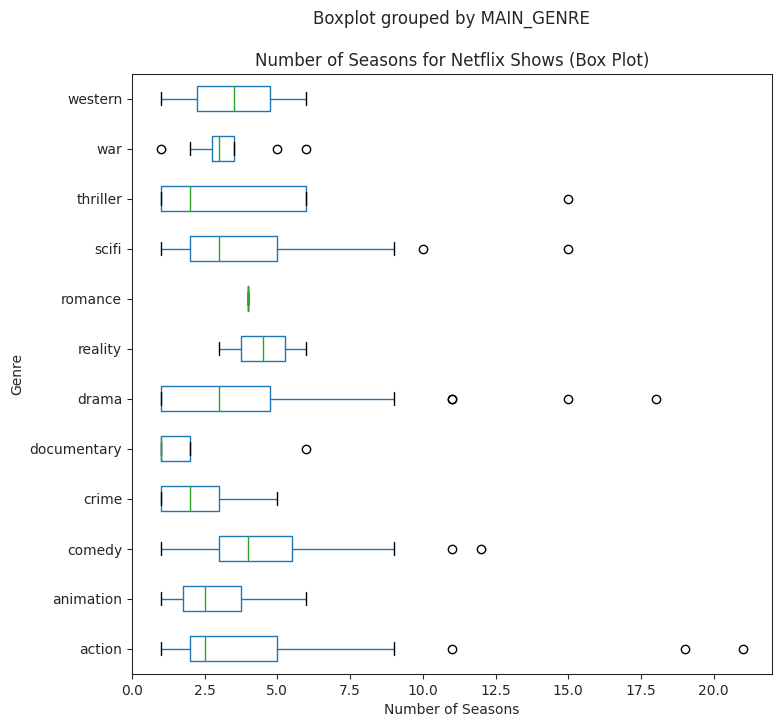

In [ ]:
# Box Plot to display Number of Seasons by Genre

# Create the box plot
ax = shows[['MAIN_GENRE', 'NUMBER_OF_SEASONS']].boxplot(column=['NUMBER_OF_SEASONS'],by='MAIN_GENRE', figsize=(8,8), vert=False, grid=False)

# Set chart title and axis labels
ax.set_title('Number of Seasons for Netflix Shows (Box Plot)')
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Genre')

The box plot above displays the average number of seasons grouped by genres. Based on the above data, we can see the mean, median, mode, min, and max for each genre and their respective number of seasons. For example, the genre action has a min number of seasons at around 1.0, a max at 9.0, and a median of 2.5 seasons.

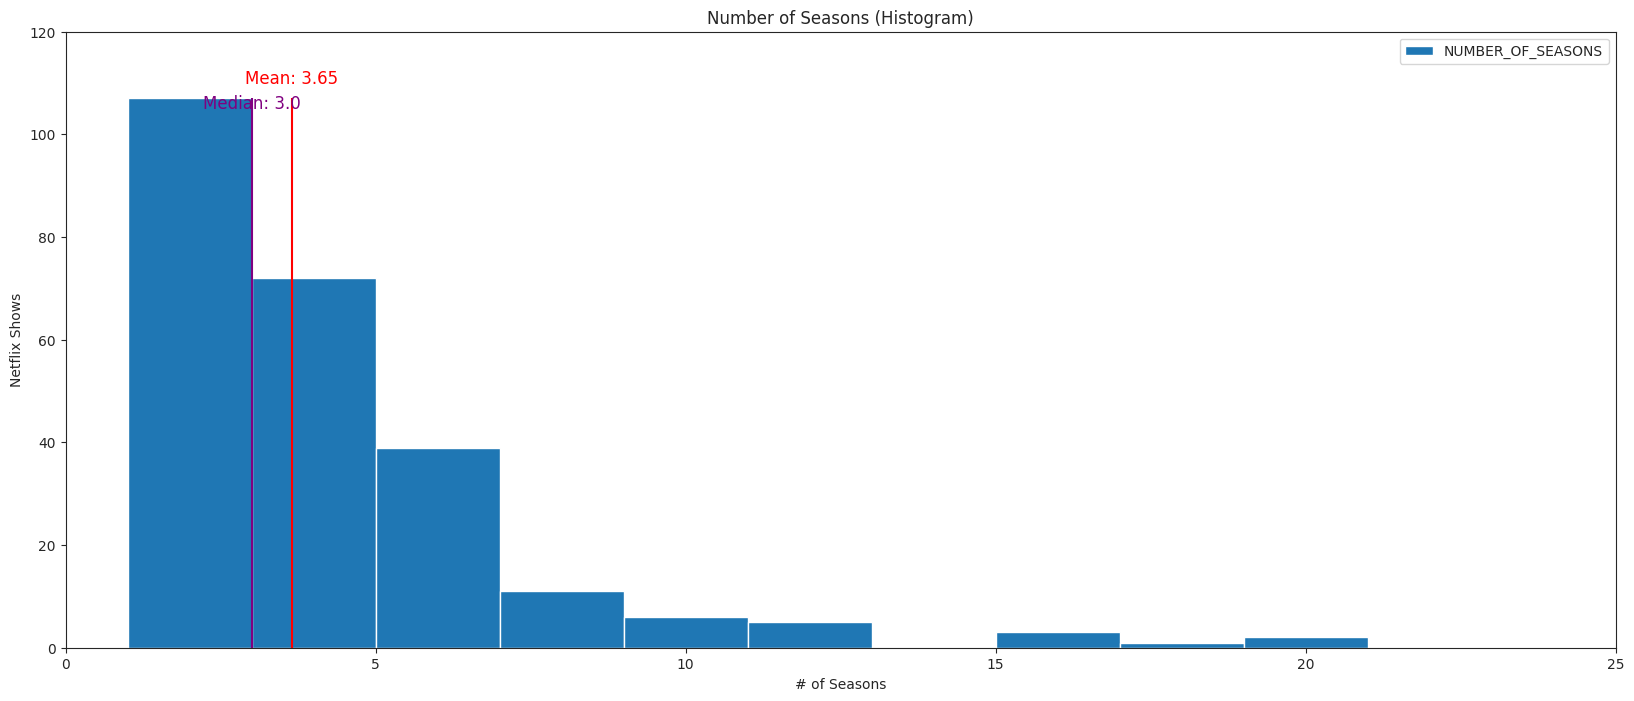

In [ ]:
# Histogram for Movie Durations

# Plot the graph
mean_seasons = shows['NUMBER_OF_SEASONS'].mean()
median_seasons = shows['NUMBER_OF_SEASONS'].median()
shows['NUMBER_OF_SEASONS'].plot(kind='hist', title='Number of Seasons (Histogram)', figsize=(20,8), xlim=(0,25), ylim=(0, 120))
plt.xlabel("# of Seasons")
plt.ylabel("Netflix Shows")
plt.vlines(x=[mean_seasons, median_seasons], colors=['red', 'purple'], ymin=0, ymax=107)

# Labels/text
plt.text(mean_seasons, 110, "Mean: {:.2f}".format(mean_seasons), color='red', fontsize=12, ha='center')
plt.text(median_seasons, 105, "Median: {}".format(median_seasons), color='purple', fontsize=12, ha='center')

# Display
plt.legend()
plt.show()

Histograms are used to summarize discrete or continuous data that are measured on an interval scale. The Histogram above displays the number of seasons most Netflix Shows have. As we can see from the graph, over 100 Netflix shows are under 5 seasons, whereas less than 10 shows have over 15 seasons. The red line on the graph represents the mean # of seasons. The purple line on the graph represents the median of seasons.

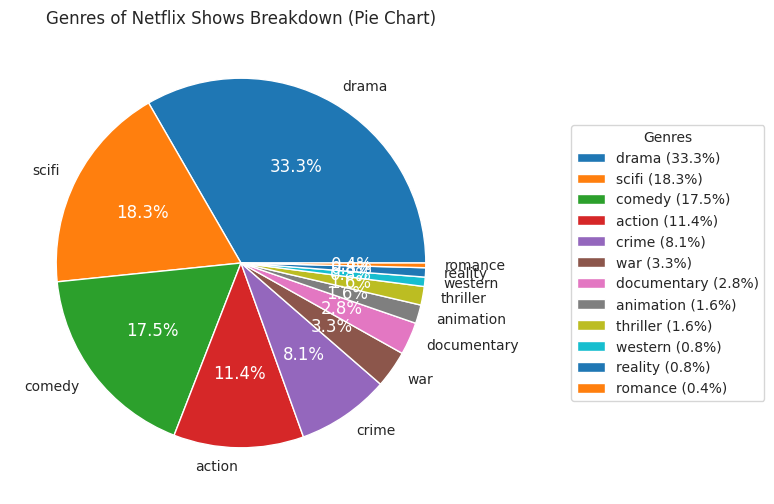

In [ ]:
# Plot the Pie Chart
fig, ax = plt.subplots(figsize=(6, 6))
ax = shows['MAIN_GENRE'].value_counts().plot(kind='pie')
appearances = shows['MAIN_GENRE'].value_counts()
wedges, texts, autotexts = ax.pie(appearances,
                                  autopct ='%.1f%%',
                                  textprops={'size': 'large', 'color': 'w'},
                                  )

# Adjust the text position
for text, autotext in zip(texts, autotexts):
    x, y = autotext.get_position()
    text.set_position((x, y-0.1))

# Add legend
# ax.legend(labels=appearances.index, title="Genres", loc="center left", bbox_to_anchor=(1.2, 0.5))
legend_labels = [f"{genre} ({count:.1f}%)"
                 for genre, count in zip(appearances.index, 100*appearances.values/appearances.sum())]
ax.legend(wedges, legend_labels, title="Genres", loc="center left", bbox_to_anchor=(1.2, 0.5))


# Set title and axis labels
ax.set_title('Genres of Netflix Shows Breakdown (Pie Chart)')
ax.set_ylabel('')

# Show the plot
plt.show()

Pie charts are useful for presenting qualitative data in a way that allows for easy visualization of proportions or percentages. They are particularly effective when comparing parts of a whole and showing how much each part contributes to the total. This pie chart is useful because it provides a visualization of the proportion of Netflix's show catalog that belongs to each genre. At the highest we have drama with 33.3% and  lowest is romance at 0.4%

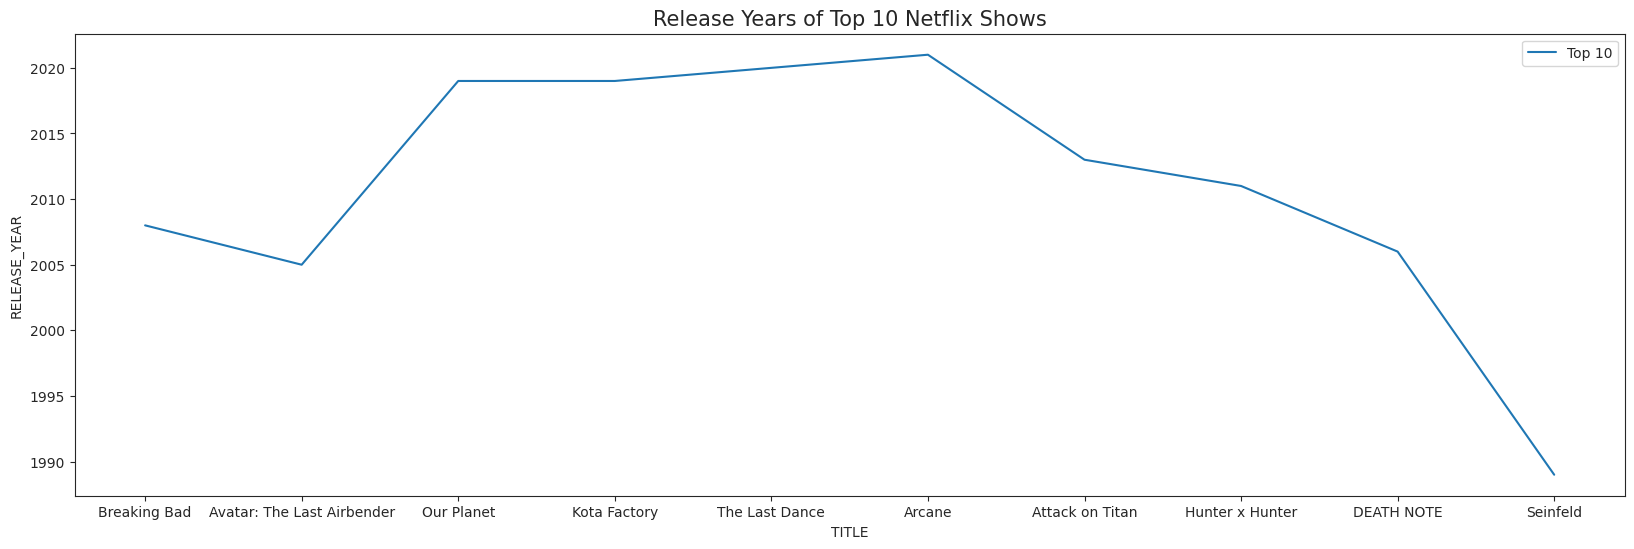

In [ ]:
# Line Plot to display release years of top 10 Netflix Shows

# Plot the graph
plt.figure(figsize=(20, 6))
plt.title("Release Years of Top 10 Netflix Shows",fontsize=15)
sns.lineplot(y='RELEASE_YEAR',x='TITLE',data=shows.head(10), label='Top 10')

# Display the graph
plt.show()

Line graphs are a type of graph used to display trends or patterns over time or other continuous variable. In the line graph above, we can see the year of release for the top 10 Netflix shows. We can see that the most popular shows were released between 2005-2020.

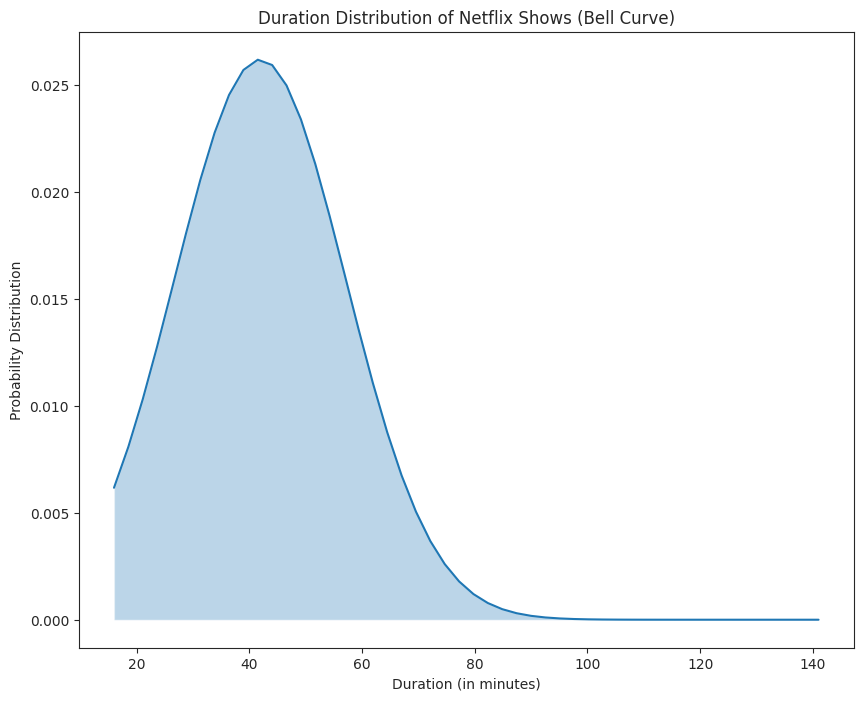

In [ ]:
# Bell curve distribution to display mean and std dev

# Calculate mean and standard deviation of duration for Netflix shows.
range = np.linspace(shows['DURATION'].min(), shows['DURATION'].max())
mean = shows['DURATION'].mean()
std = shows['DURATION'].std()

# Plot data
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(range, norm.pdf(range, mean, std))
ax.fill_between(range, norm.pdf(range, mean, std), 0, alpha=.3)

# Labels
ax.set_title('Duration Distribution of Netflix Shows (Bell Curve)')
ax.set_xlabel('Duration (in minutes)')
ax.set_ylabel('Probability Distribution')

plt.show()

Bell curve graphs, also known as normal distribution curves, are useful for visualizing and analyzing data that is normally distributed. They provide a visual representation of the distribution of data around the mean, or average value, of the data. Above is a bell curve of the average duration (in minutes) of Netflix Shows.